In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv('./datapoints.csv')
df = df[df['name'].str.contains("BLOK61")]
#df = df[df['timestamp'].str.contains("2021-04-24")]
df['timestamp'] = pd.to_datetime(df.pop('timestamp'), format='%Y-%m-%d %H:%M:%S')
df.sort_values(by='value')

#df.head()
df.head()

,name,attribute_name,value,timestamp
1,Philitelaan BLOK61,occupied,1.0,2021-04-18 05:03:14.379
3,Philitelaan BLOK61,occupied,1.0,2021-04-18 05:04:16.818
5,Philitelaan BLOK61,occupied,2.0,2021-04-23 04:20:38.037
7,Philitelaan BLOK61,occupied,1.0,2021-04-23 04:21:42.959
9,Philitelaan BLOK61,occupied,1.0,2021-04-18 05:05:27.875


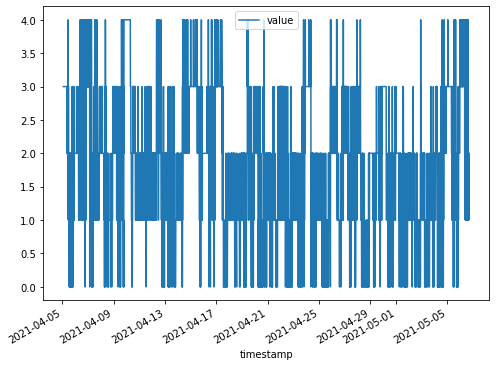

In [2]:
plot_cols = ['value']
plot_features = df[plot_cols]
plot_features.index = df['timestamp']
_ = plot_features.plot(subplots=True)


In [3]:
shift_days = 1
shift_steps = shift_days * 24  # Number of hours.

df.head()

,name,attribute_name,value,timestamp
1,Philitelaan BLOK61,occupied,1.0,2021-04-18 05:03:14.379
3,Philitelaan BLOK61,occupied,1.0,2021-04-18 05:04:16.818
5,Philitelaan BLOK61,occupied,2.0,2021-04-23 04:20:38.037
7,Philitelaan BLOK61,occupied,1.0,2021-04-23 04:21:42.959
9,Philitelaan BLOK61,occupied,1.0,2021-04-18 05:05:27.875


In [4]:
x_data = df.values[0:-shift_steps]
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (38941, 4)


In [5]:
y_data = df.values[:-shift_steps]
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (38941, 4)


In [6]:
num_data = len(x_data)
num_data


38941

In [7]:
train_split = 0.9
num_train = int(train_split * num_data)
num_train

35046

In [8]:
num_test = num_data - num_train
num_test

3895

In [9]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

38941

In [10]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

38941

In [11]:
num_x_signals = x_data.shape[1]
num_x_signals

4

In [12]:
num_y_signals = y_data.shape[1]
num_y_signals

4

In [13]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

TypeError: '<=' not supported between instances of 'str' and 'Timestamp'

In [ ]:
x_scaler = MinMaxScaler()

x_train_scaled = x_scaler.fit_transform(x_train)

print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))